#Data Exploration

In [1]:
#Importing the necessery libraries for this step
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
df = pd.read_csv("Big Mart Sales.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 5 numerical and 7 categorical fields.

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We can observe an interesting minimum value for Item_visibility because it shows there are some items with zero visibility. This is most likely to be due to glitches in data collection by the stores and should be considered missing values. There are some missing values in Item_weight field also. We can see that Item_MRP and Item_Outlet_Sales do not have any zero or negative values which is good. If we notice the minimum, maximum and quartile values we can understand that the data does not have any outliers.

In [6]:
df.describe(include= 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


There are some missing data in the Outlet_Size field.

In [7]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_fat_Content has actually two unique values Low Fat and Regular.

In [8]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [9]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [10]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [11]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

The value_counts() shows that there is no possibility of outliers in the categorical fields as well.

In [12]:
df.duplicated().any()

False

There is no duplicate row in the data.

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

The fields have a very high percentage of missing values and thus we can not remove all the rows with missing values. These two fields are also important parts of the feature list and therefore we can not drop these fields. We have to find the best way for missing value imputation in these fields.

#Missing Value Imputaion

In [15]:
#Let us first try out univariate methods such as mean, median and interpolation to fill the gaps in the Item_Weight field.

df["Item_Weight_mean"]= df["Item_Weight"].fillna(df["Item_Weight"].mean())
df["Item_Weight_median"]= df["Item_Weight"].fillna(df["Item_Weight"].median())
df["Item_Weight_Interpolate"] = df["Item_Weight"].interpolate(method = "linear")

In [16]:
#Let us check the differences among the variances
print( "variance of original data:", df["Item_Weight"].var())
print( "variance of mean weight:", df["Item_Weight_mean"].var())
print( "variance of median weight:", df["Item_Weight_median"].var())
print( "variance of interpolation weight:", df["Item_Weight_Interpolate"].var())

variance of original data: 21.561688259836558
variance of mean weight: 17.86012173506058
variance of median weight: 17.869561454073647
variance of interpolation weight: 19.758685821975472


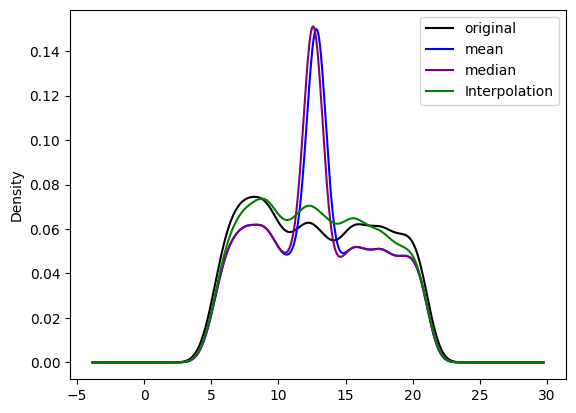

In [17]:
#We can also see this graphically.

df["Item_Weight"].plot(kind="kde", label = "original", color = "Black")
df["Item_Weight_mean"].plot(kind="kde", label = "mean", color = "Blue")
df["Item_Weight_median"].plot(kind="kde", label = "median", color = "Purple")
df["Item_Weight_Interpolate"].plot(kind="kde", label = "Interpolation", color = "green")

plt.legend()
plt.show()

In [18]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors = 10, weights ="distance")

df["knn_item_weight"] = knn.fit_transform(df[["Item_Weight"]]).ravel()

In [19]:
print( "variance of knn item weight:", df["knn_item_weight"].var())

variance of knn item weight: 17.86012173506058


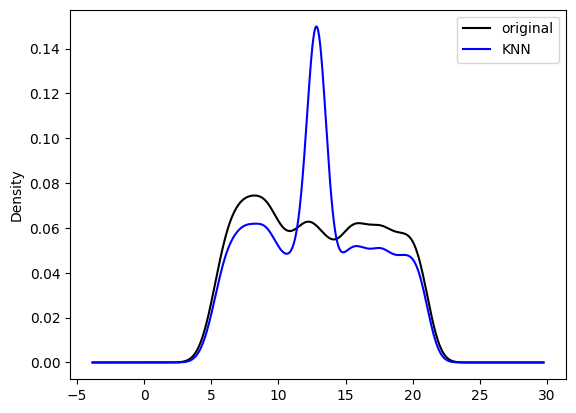

In [20]:
df["Item_Weight"].plot(kind="kde", label = "original", color = "Black")

df["knn_item_weight"].plot(kind="kde", label = "KNN", color = "Blue")

plt.legend()
plt.show()

The variances and graphs shows that interpolation method is good for missing value imputaion for this field.

In [21]:
df["Item_Weight"].fillna(df["Item_Weight"].interpolate(method = "linear"), inplace = True)

In [22]:
df.drop(["Item_Weight_mean", "Item_Weight_median", "Item_Weight_Interpolate", "knn_item_weight"], inplace= True, axis = 1)

In [23]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Next we clean the Item_Visibility field.

In [25]:
df['Item_Visibility'].replace(0, np.nan, inplace=True)

In [26]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
#Let us try out univariate methods such as mean, median and interpolation to fill the gaps in the Item_Visibility field.

df["Item_Visibility_mean"]=df["Item_Visibility"].fillna(df["Item_Visibility"].mean())
df["Item_Visibility_median"]= df["Item_Visibility"].fillna(df["Item_Visibility"].median())
df["Item_Visibility_Interpolate"]= df["Item_Visibility"].interpolate(method = "linear")

In [28]:
print( "variance of original data:", df["Item_Visibility"].var())
print( "variance of mean Visibility:", df["Item_Visibility_mean"].var())
print( "variance of median Visibility:", df["Item_Visibility_median"].var())
print( "variance of interpolation Visibility:", df["Item_Visibility_Interpolate"].var())

variance of original data: 0.0025308502760417444
variance of mean Visibility: 0.002374639615962191
variance of median Visibility: 0.002383965020805575
variance of interpolation Visibility: 0.00244957224486514


Interpolation is best suited for missing value imputation in this field.

In [29]:
df["Item_Visibility"].fillna(df["Item_Visibility"].interpolate(method = "linear"), inplace = True)

In [30]:
df.drop(["Item_Visibility_mean", "Item_Visibility_median", "Item_Visibility_Interpolate"], axis = 1, inplace=True)

In [31]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015755,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.014751,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
pivot_table = pd.pivot_table(df, index='Outlet_Type', columns='Outlet_Size', aggfunc='size', fill_value=0)

pivot_table

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [34]:
pd.pivot_table(df[df['Outlet_Size'].isnull()], index='Outlet_Type', aggfunc='size')

Outlet_Type
Grocery Store         555
Supermarket Type1    1855
dtype: int64

In [35]:
df["Outlet_Size"]= df["Outlet_Size"].fillna("Small")

In [36]:
df["Outlet_Size"].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [37]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Data Preprocessing

In [38]:
#Let's clean the Item_Fat_Content field

df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF": "Low Fat", "reg" : "Regular", "low fat" : "Low Fat"})

In [39]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [40]:
df.drop("Item_Identifier", axis = 1, inplace= True)

In [41]:
df["Outlet_age"]= dt.datetime.today().year - df["Outlet_Establishment_Year"]

In [42]:
df.drop(["Outlet_Establishment_Year"], axis = 1, inplace= True)

In [43]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,19.20,Regular,0.015755,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,26
4,8.93,Low Fat,0.014751,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


#Data Visualization

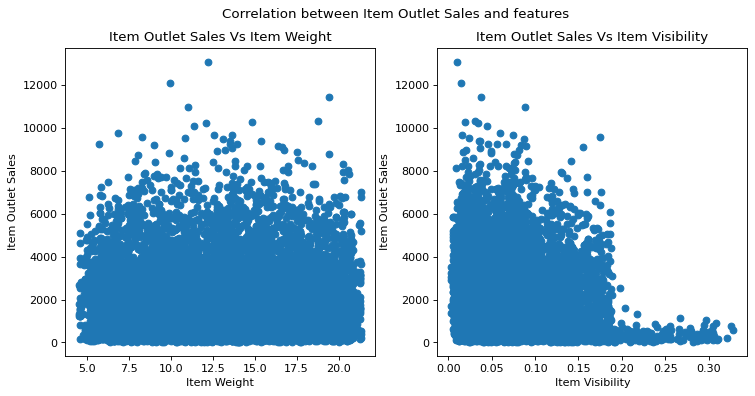

In [44]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (11,5), dpi = 80)
fig.suptitle("Correlation between Item Outlet Sales and features")

axs[0].set_title("Item Outlet Sales Vs Item Weight")
axs[0].set_xlabel("Item Weight")
axs[0].set_ylabel("Item Outlet Sales")
axs[0].scatter(df['Item_Weight'], df['Item_Outlet_Sales'])

axs[1].set_title("Item Outlet Sales Vs Item Visibility")
axs[1].set_xlabel("Item Visibility")
axs[1].set_ylabel("Item Outlet Sales")
axs[1].scatter(df['Item_Visibility'], df['Item_Outlet_Sales'])

plt.show()

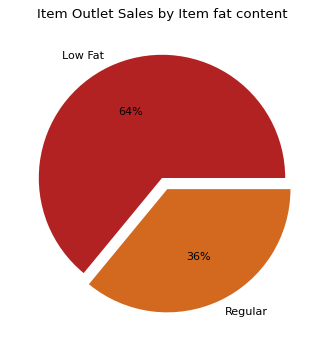

In [45]:
Sales_Fat_Content = df.groupby("Item_Fat_Content").agg({"Item_Outlet_Sales": "sum"}).values.ravel()

color = ["Firebrick", "Chocolate"]
explode = [0, 0.1]

plt.figure(figsize = (5, 5), dpi = 80)
plt.pie(Sales_Fat_Content, labels = df['Item_Fat_Content'].value_counts().index , autopct = "%1.0f%%", colors = color, explode = explode)
plt.title("Item Outlet Sales by Item fat content")
plt.show()

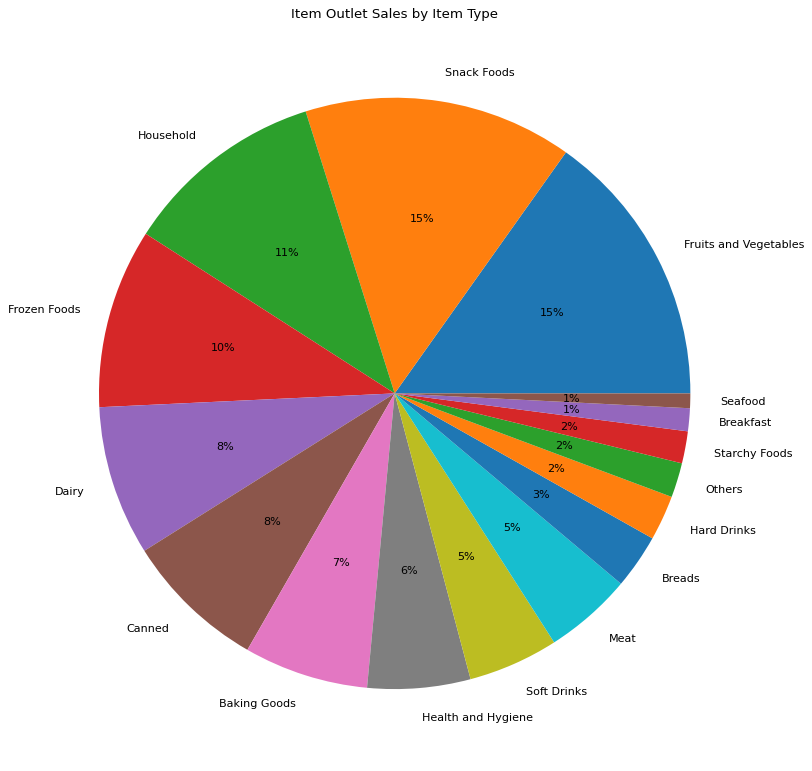

In [46]:
Sales_Item = df.groupby("Item_Type").agg({"Item_Outlet_Sales": "sum"}).values.ravel()

plt.figure(figsize = (12, 12), dpi = 80)
plt.pie(sorted(Sales_Item, reverse=True), labels = df['Item_Type'].value_counts().index, autopct = "%1.0f%%")
plt.title("Item Outlet Sales by Item Type")
plt.show()

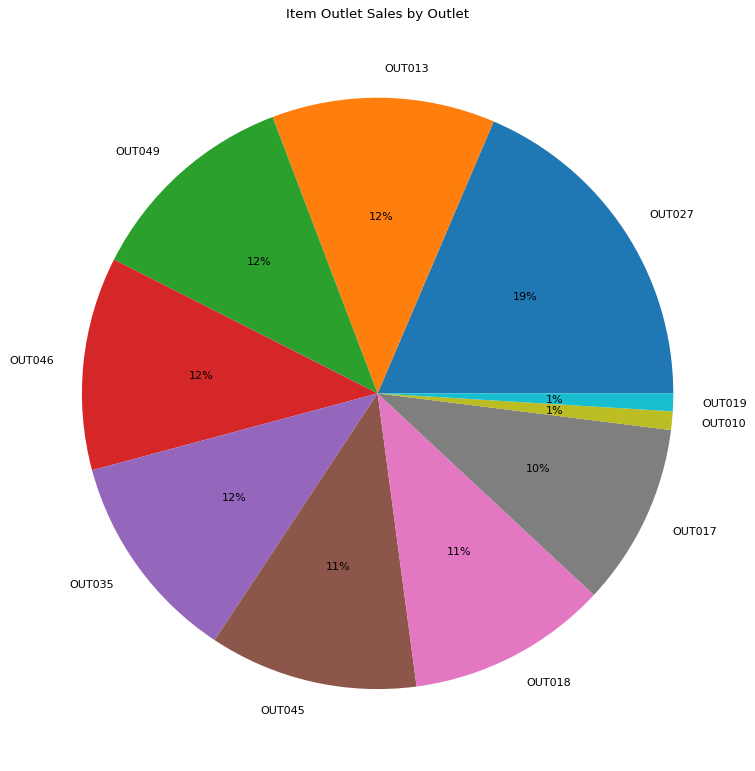

In [47]:
Sales_Item = df.groupby("Outlet_Identifier").agg({"Item_Outlet_Sales": "sum"}).values.ravel()

plt.figure(figsize = (12, 12), dpi = 80)
plt.pie(sorted(Sales_Item, reverse =True), labels = df['Outlet_Identifier'].value_counts().index, autopct = "%1.0f%%")
plt.title("Item Outlet Sales by Outlet")
plt.show()

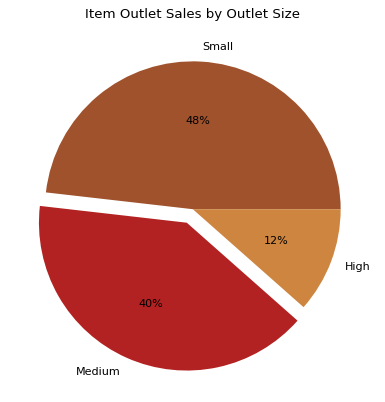

In [48]:
Sales_Outlet_Size = df.groupby("Outlet_Size").agg({"Item_Outlet_Sales": "sum"}).values.ravel()

plt.figure(figsize = (6, 6), dpi = 80)
plt.pie(sorted(Sales_Outlet_Size, reverse = True), labels = df['Outlet_Size'].value_counts().index, autopct = "%1.0f%%",  explode = [0, 0.1, 0], colors = ["sienna", "Firebrick", "Peru"])
plt.title("Item Outlet Sales by Outlet Size")
plt.show()

In [49]:
sorted(Sales_Outlet_Size, reverse = True)

[8958743.1406, 7489718.6916, 2142663.5782]

In [50]:
df['Outlet_Size'].value_counts().index

Index(['Small', 'Medium', 'High'], dtype='object', name='Outlet_Size')

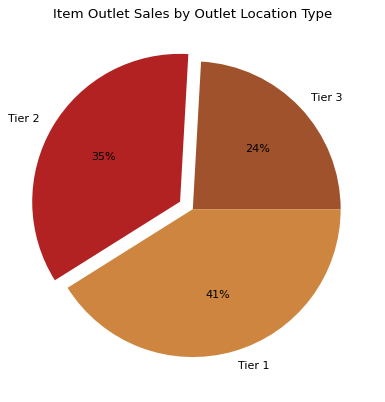

In [51]:
Sales_Outlet_Location = df.groupby("Outlet_Location_Type").agg({"Item_Outlet_Sales": "sum"}).values.ravel()

plt.figure(figsize = (6, 6), dpi = 80)
plt.pie(Sales_Outlet_Location , labels = df['Outlet_Location_Type'].value_counts().index, autopct = "%1.0f%%",
        explode = [0, 0.1, 0], colors = ["sienna", "Firebrick", "Peru"])
plt.title("Item Outlet Sales by Outlet Location Type")
plt.show()

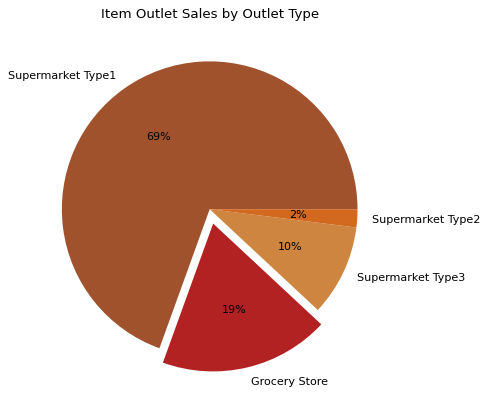

In [52]:
Sales_Outlet_Type = df.groupby("Outlet_Type").agg({"Item_Outlet_Sales": "sum"}).values.ravel()

plt.figure(figsize = (6, 6), dpi = 80)
plt.pie(sorted(Sales_Outlet_Type, reverse=True) , labels = df['Outlet_Type'].value_counts().index, autopct = "%1.0f%%",
        explode = [0, 0.1, 0, 0], colors = ["sienna", "Firebrick", "Peru", "Chocolate"])
plt.title("Item Outlet Sales by Outlet Type")
plt.show()

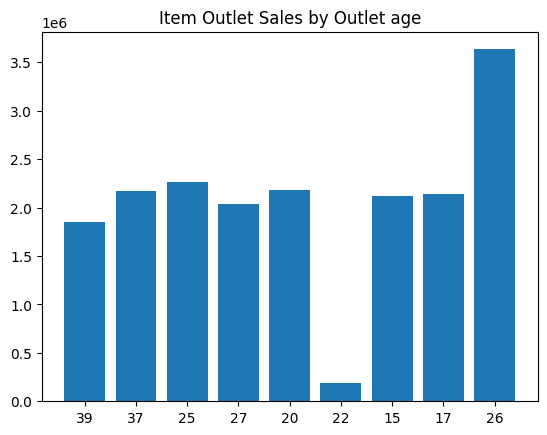

In [53]:
Sales_Outletage = df.groupby("Outlet_age").agg({"Item_Outlet_Sales": "sum"}).values.ravel()

plt.bar(range(len(df['Outlet_age'].value_counts())), Sales_Outletage)
plt.title("Item Outlet Sales by Outlet age")
plt.xticks(range(len((df['Outlet_age'].value_counts()))) , df['Outlet_age'].value_counts().index)
plt.show()